In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import proplot as plot
plot.rc['figure.facecolor'] = 'w'
import copy 


import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_percentage_error

# 使用sklearn调用衡量线性回归的MSE 、 RMSE、 MAE、r2
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def density_scatter( x , y, ax = None, sort = True, bins = 20,percent=80,metawidth=0.4, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
    
    
    m=ax.scatter( x, y#c=z
                 , vmax=np.percentile(z, percent),vmin=0,**kwargs )#vmax=80%
    
    if 'cmap' in kwargs:
    # 包含cmap参数
        cmap = kwargs['cmap']
    vmin = np.min(z)
    vmax = np.max(z)
    if 'vmin' in kwargs:
    # 包含cmap参数
        vmin = kwargs['vmin']    
    if 'vmax' in kwargs:
    # 包含cmap参数
        vmax = kwargs['vmax'] 
        
    norm = Normalize(vmin = vmin, vmax = vmax)
    #cbar = ax.colorbar(cm.ScalarMappable(norm = norm,cmap=cmap))
#     cbar=ax.colorbar(m,loc='r',lw=metawidth)
#     cbar.ax.set_ylabel('Density')

    return ax,m



In [26]:
#dsout.interp_like(dsy),dsy)
#x,y=dsout.interp_like(dsy).values.flatten(),dsy.values.flatten()



dx=5
dx2=1
# 生成随机数据
np.random.seed(0)
n_samples = 100
x = np.random.rand(n_samples)*10
y = 1 * x + np.random.randn(n_samples)*1  # y = 2x + 噪声

nan_union = np.isnan(x) + np.isnan(y)
y=y[~nan_union]
x=x[~nan_union]
print('a')
R=pearsonr(x,y)[0]
print(R)
print("mean_absolute_error:", mean_absolute_error(x,y))
print("mean_squared_error:", mean_squared_error(x,y))
print("rmse:", sqrt(mean_squared_error(x,y)))
print("r2 score:", r2_score(x,y))
mape=mean_absolute_percentage_error(x,y)
print("mape:",mape)

a
0.944522569256287
mean_absolute_error: 0.8623845994287559
mean_squared_error: 1.0297617241074744
rmse: 1.0147717596127093
r2 score: 0.8761081822858403
mape: 0.37054958340747335


In [27]:
y

array([ 4.32298520e+00,  8.05272015e+00,  6.49329620e+00,  3.91258814e+00,
        5.72480019e+00,  8.35483031e+00,  5.55465168e+00,  8.73780517e+00,
        8.56587498e+00,  4.88886692e+00,  7.51407343e+00,  6.51139427e+00,
        5.88872059e+00,  1.02326054e+01,  1.06672698e+00,  1.57786617e+00,
        2.12683995e-01,  1.01120689e+01,  7.90847960e+00,  9.10211085e+00,
        1.16693341e+01,  6.64382658e+00,  3.34430862e+00,  8.77468847e+00,
        9.62085358e-03,  8.34283140e+00,  1.01991389e+00,  8.69923436e+00,
        7.14142524e+00,  5.62713419e+00,  4.51311508e+00,  8.64838155e+00,
        3.70027764e+00,  7.59440444e+00, -8.01053666e-02,  6.97881137e+00,
        7.06820919e+00,  6.01432988e+00,  1.00515602e+01,  7.74040966e+00,
        3.97150454e+00,  3.27091875e+00,  7.27455013e+00,  1.92864061e+00,
        5.97309929e+00,  6.55674416e+00,  1.66867206e+00,  3.13852671e+00,
        3.82657827e+00,  4.04456955e+00,  4.93205163e+00,  4.92526433e+00,
        9.20940572e+00,  

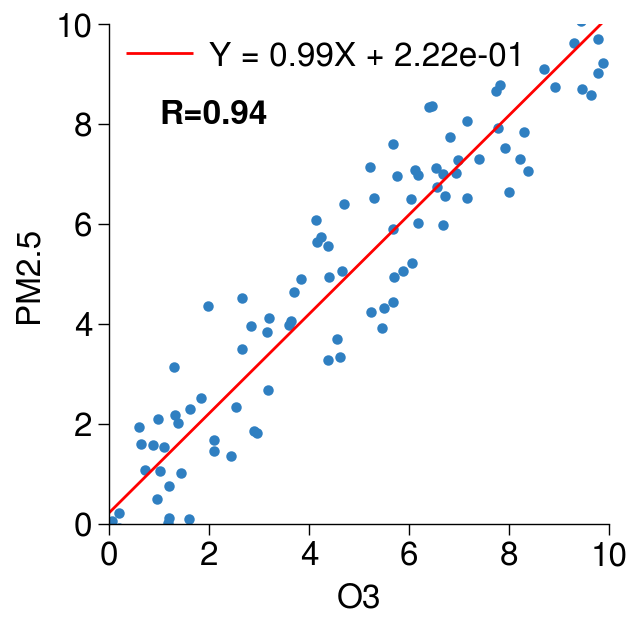

In [30]:


fontsize=12
metawidth=0.5
xlabel='O3'
ylabel='PM2.5'
fig,axs=plot.subplots(refwidth=2.5,refheight=2.5)

fig.format(abc=False,suptitlesize=20,xlim=(0,10),ylim=(0,10),xlabel=xlabel
           ,ylabel=ylabel
           ,grid=False,xtickminor=False,ytickminor=False,metawidth=metawidth,labelsize=fontsize#,xlabelpad=10
           ,xlocator=2,ylocator=2)
ax=axs[0]
ax,m=density_scatter(x[::1],y[::1] ,ax=ax, s=10,bins=(500, 500),color='#2f7fc1',alpha=1#'rainbow'
              ,percent=80 )



# 拟合线性回归线
slope, intercept = np.polyfit(x,y, 1)
x0=np.arange(0,10e16,1e16)
regression_line = slope * x0 + intercept




# 在图表中标注线性拟合的公式
equation = f'Y = {slope:.2f}X + {intercept:.2e}'
#ax.annotate(equation, xy=(x.mean(), y[::10].mean()), fontsize=10, color='r'
#           ,bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white"))


l2=ax.plot(x0, regression_line, color='red',label=equation,lw=1)
#ax.plot(x0, x0, color='grey',lw=1,linestyle='--')
ax.legend([l2],loc='ul',frameon=False,prop=dict(size=fontsize))
ax.text(0.1,0.8,f'R={R:.2f}'
        ,fontweight='bold'
        ,fontsize=fontsize, transform=ax.transAxes)
# ax.text(0.1,0.7,f'MAPE={mape:.2%}'
#         ,fontweight='bold'
#         ,fontsize=fontsize, transform=ax.transAxes)


# ax.text(0.9,0.2,f'Daily'
#         ,fontweight='bold',color='grey',horizontalalignment='right',  # 水平居中
#         verticalalignment='center'  # 垂直居中
#         ,fontsize=fontsize, transform=ax.transAxes)
ax.yaxis.offsetText.set_fontsize(fontsize)
ax.xaxis.offsetText.set_fontsize(fontsize)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.format(labelsize=fontsize,ticklabelsize=fontsize,title='',titlesize=fontsize)

